In [21]:
import pandas as pd
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split,GridSearchCV
import seaborn as sns

In [5]:
df= pd.read_csv('Advertising.csv',index_col=0)

In [6]:
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [7]:
features= df.drop('sales',axis=1)
target= df[['sales']]

In [10]:
x_train,x_test,y_train,y_test= train_test_split(features,target, train_size=0.75,random_state=100)

In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(150, 3)
(150, 1)
(50, 3)
(50, 1)


In [74]:
lasso= Lasso(alpha=0)

In [75]:
lasso.fit(x_train,y_train)

C:\Users\excel\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\excel\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\excel\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.324e+02, tolerance: 4.400e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

Lasso(alpha=0)

In [76]:
y_pred= lasso.predict(x_test)

In [77]:
lasso.coef_

array([0.0456949 , 0.18797457, 0.00473567])

In [78]:
lasso.intercept_

array([2.65537715])

In [79]:
lasso.score(x_test,y_test)

0.9018593061633754

<Axes: xlabel='sales'>

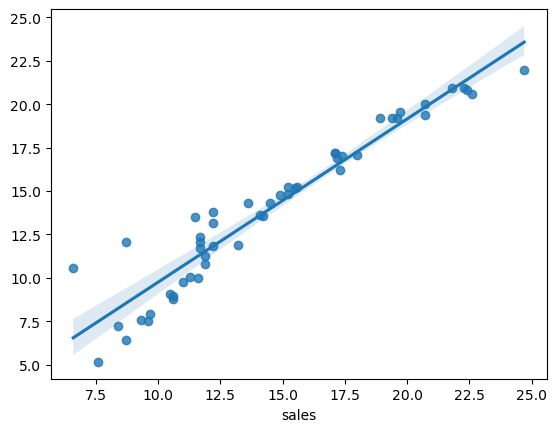

In [80]:
sns.regplot(data=df,x=y_test,y=y_pred)

## Ridge

In [55]:
ridge= Ridge(alpha=2)

In [56]:
ridge.fit(x_train,y_train)

Ridge(alpha=2)

In [57]:
y_pred1= ridge.predict(x_test)
y_pred1

array([[10.56351082],
       [20.01229122],
       [16.8890465 ],
       [19.17966349],
       [20.9525089 ],
       [13.17461428],
       [11.82547796],
       [12.37071096],
       [20.56960801],
       [20.94263758],
       [10.79964913],
       [19.56534116],
       [ 6.43577087],
       [15.24808529],
       [ 8.98086656],
       [ 7.91944123],
       [16.21596925],
       [12.06576113],
       [17.07874585],
       [11.26799273],
       [16.99629913],
       [ 9.7882122 ],
       [20.80081531],
       [17.20488735],
       [15.15601184],
       [21.94743694],
       [19.20975034],
       [10.06604895],
       [19.36412893],
       [14.84285586],
       [14.31411475],
       [ 7.56084228],
       [ 9.9943308 ],
       [14.78791562],
       [ 7.20788536],
       [13.5860143 ],
       [ 7.52124071],
       [11.74578364],
       [13.51926656],
       [15.25367334],
       [17.20711173],
       [13.59015062],
       [14.32541271],
       [13.78474774],
       [11.88712685],
       [ 8

In [58]:
ridge.coef_

array([[0.04569479, 0.18796153, 0.00473901]])

In [59]:
ridge.intercept_

array([2.65559419])

In [60]:
ridge.score(x_test,y_test)

0.9018585190908972

## ElasticNet

In [61]:
elastic= ElasticNet(alpha=5)

In [62]:
elastic.fit(x_train,y_train)

ElasticNet(alpha=5)

In [63]:
y_pred2= elastic.predict(x_test)

In [64]:
elastic.score(x_test,y_test)

0.9048468945095454

In [68]:
value= range(0,100)
params= dict(alpha=value)

In [70]:
params

{'alpha': range(0, 100)}

In [71]:
grid_search= GridSearchCV(lasso,params,verbose=2)

In [72]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ............................................alpha=0; total time=   0.0s
[CV] END ............................................alpha=0; total time=   0.0s
[CV] END ............................................alpha=0; total time=   0.0s
[CV] END ............................................alpha=0; total time=   0.0s
[CV] END ............................................alpha=0; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=2; total time=   0.0s
[CV] END .....................................

C:\Users\excel\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\excel\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\excel\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.070e+02, tolerance: 3.931e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

[CV] END ............................................alpha=2; total time=   0.0s
[CV] END ............................................alpha=2; total time=   0.0s
[CV] END ............................................alpha=2; total time=   0.0s
[CV] END ............................................alpha=3; total time=   0.0s
[CV] END ............................................alpha=3; total time=   0.0s
[CV] END ............................................alpha=3; total time=   0.0s
[CV] END ............................................alpha=3; total time=   0.0s
[CV] END ............................................alpha=3; total time=   0.0s
[CV] END ............................................alpha=4; total time=   0.0s
[CV] END ............................................alpha=4; total time=   0.0s
[CV] END ............................................alpha=4; total time=   0.0s
[CV] END ............................................alpha=4; total time=   0.0s
[CV] END ...................

C:\Users\excel\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\excel\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\excel\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.324e+02, tolerance: 4.400e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

GridSearchCV(estimator=Lasso(alpha=10), param_grid={'alpha': range(0, 100)},
             verbose=2)

In [73]:
grid_search.best_params_

{'alpha': 0}